In [1]:
#importando as bibliotecas necessárias para o experimento:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import callbacks

C:\Users\bruno\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import redesneuraiscin.utils as utils

In [3]:
#X e Y para cada treino, validação e teste:
X_train, Y_train, X_val, Y_val, X_test, Y_test = utils.datasets_split()

Matriz de confusão no conjunto de teste:
[[33156 30619]
 [16510 50540]]

Train Loss:       0.2187
Validation Loss:  0.2211

Performance no conjunto de teste:


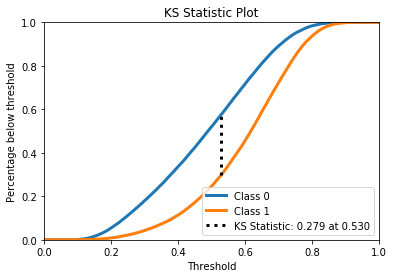


Accuracy:         0.6398
Recall:           0.7538
Precision:        0.6227
F1:               0.6820
AUROC:            0.6915
AUPR:             0.6800


In [6]:
#Este foram os resultados da MLP default(Experimento 1):
utils.results_summary(history, Y_test, y_pred_class, y_pred_scores)

input_dim:  243
Train on 261647 samples, validate on 130822 samples
Epoch 1/100000
261647/261647 [==============================] - 11s 44us/step - loss: 0.2282 - acc: 0.6249 - val_loss: 0.2237 - val_acc: 0.6357
Epoch 2/100000
261647/261647 [==============================] - 12s 46us/step - loss: 0.2232 - acc: 0.6377 - val_loss: 0.2244 - val_acc: 0.6343
Epoch 3/100000
261647/261647 [==============================] - 13s 49us/step - loss: 0.2212 - acc: 0.6415 - val_loss: 0.2218 - val_acc: 0.6402
Epoch 4/100000
261647/261647 [==============================] - 20s 76us/step - loss: 0.2198 - acc: 0.6454 - val_loss: 0.2216 - val_acc: 0.6393
Epoch 5/100000
261647/261647 [==============================] - 15s 58us/step - loss: 0.2186 - acc: 0.6485 - val_loss: 0.2218 - val_acc: 0.6401
Epoch 6/100000
261647/261647 [==============================] - 17s 66us/step - loss: 0.2174 - acc: 0.6512 - val_loss: 0.2209 - val_acc: 0.6416
Epoch 7/100000
261647/261647 [==============================] - 14s 

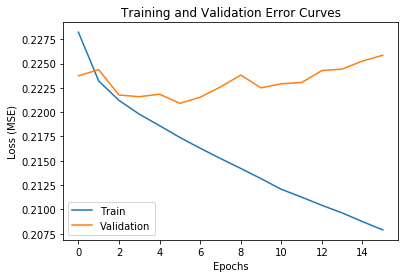

In [4]:
#EXPERIMENTO 2
#Número de Neurônios: 100 -> 1
#Criando novo modelo a ser treinado, executando-o e verificando as métricas:
#Números de camadas ocultas: 1
#Funções de ativação da camadas ocultas: tanh
#Função de ativação da camada de saída: sigmoid
#Otimizador: Adam
#Perda: MSE

input_dim = X_train.shape[1]
print("input_dim: ", input_dim)

mlp2 = models.Sequential()


mlp2.add(layers.Dense(100, activation='tanh', input_dim=input_dim))
mlp2.add(layers.Dense(1, activation='sigmoid'))
mlp2.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history2 = mlp2.fit(X_train, Y_train, batch_size=64, epochs=100000,
                         callbacks=[callbacks.EarlyStopping(patience=10)], validation_data=(X_val, Y_val))

utils.plot_training_error_curves(history2)

y_pred_scores2 = mlp2.predict(X_test)
y_pred_class2 = mlp2.predict_classes(X_test, verbose=0)
y_pred_scores_0_2 = 1 - y_pred_scores2
y_pred_scores2 = np.concatenate([y_pred_scores_0_2, y_pred_scores2], axis=1)

Matriz de confusão no conjunto de teste:
[[38476 25299]
 [22782 44268]]

Train Loss:       0.2174
Validation Loss:  0.2209

Performance no conjunto de teste:


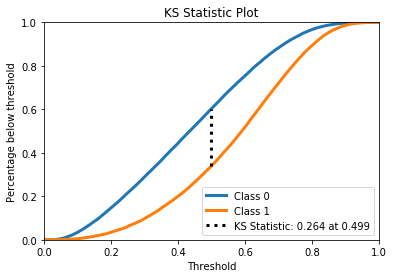


Accuracy:         0.6325
Recall:           0.6602
Precision:        0.6363
F1:               0.6481
AUROC:            0.6818
AUPR:             0.6707


In [5]:
#Avaliando o modelo:
utils.results_summary(history2, Y_test, y_pred_class2, y_pred_scores2)

input_dim:  243
Train on 261647 samples, validate on 130822 samples
Epoch 1/100000
261647/261647 [==============================] - 15s 58us/step - loss: 0.2275 - acc: 0.6258 - val_loss: 0.2287 - val_acc: 0.6252
Epoch 2/100000
261647/261647 [==============================] - 14s 53us/step - loss: 0.2228 - acc: 0.6383 - val_loss: 0.2238 - val_acc: 0.6351
Epoch 3/100000
261647/261647 [==============================] - 15s 57us/step - loss: 0.2210 - acc: 0.6424 - val_loss: 0.2226 - val_acc: 0.6378
Epoch 4/100000
261647/261647 [==============================] - 15s 56us/step - loss: 0.2195 - acc: 0.6466 - val_loss: 0.2211 - val_acc: 0.6415
Epoch 5/100000
261647/261647 [==============================] - 14s 54us/step - loss: 0.2181 - acc: 0.6492 - val_loss: 0.2210 - val_acc: 0.6414
Epoch 6/100000
261647/261647 [==============================] - 18s 70us/step - loss: 0.2165 - acc: 0.6527 - val_loss: 0.2233 - val_acc: 0.6355
Epoch 7/100000
261647/261647 [==============================] - 17s 

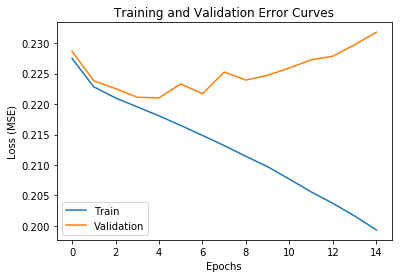

In [6]:
#EXPERIMENTO 3
#Número de Neurônios: 100 -> 100
#Criando novo modelo a ser treinado, executando-o e verificando as métricas:
#Números de camadas ocultas: 2
#Funções de ativação da camadas ocultas: tanh -> tanh
#Função de ativação da camada de saída: sigmoid
#Otimizador: Adam
#Perda: MSE

input_dim = X_train.shape[1]
print("input_dim: ", input_dim)

mlp3 = models.Sequential()


mlp3.add(layers.Dense(100, activation='tanh', input_dim=input_dim))
mlp3.add(layers.Dense(100, activation='tanh'))
mlp3.add(layers.Dense(1, activation='sigmoid'))
mlp3.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history3 = mlp3.fit(X_train, Y_train, batch_size=64, epochs=100000,
                         callbacks=[callbacks.EarlyStopping(patience=10)], validation_data=(X_val, Y_val))

utils.plot_training_error_curves(history3)

y_pred_scores3 = mlp3.predict(X_test)
y_pred_class3 = mlp3.predict_classes(X_test, verbose=0)
y_pred_scores_0_3 = 1 - y_pred_scores3
y_pred_scores3 = np.concatenate([y_pred_scores_0_3, y_pred_scores3], axis=1)

Matriz de confusão no conjunto de teste:
[[40669 23106]
 [26040 41010]]

Train Loss:       0.2181
Validation Loss:  0.2210

Performance no conjunto de teste:


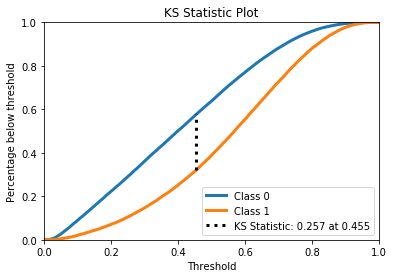


Accuracy:         0.6243
Recall:           0.6116
Precision:        0.6396
F1:               0.6253
AUROC:            0.6749
AUPR:             0.6650


In [7]:
#Avaliando o modelo:
utils.results_summary(history3, Y_test, y_pred_class3, y_pred_scores3)

input_dim:  243
Train on 261647 samples, validate on 130822 samples
Epoch 1/100000
261647/261647 [==============================] - 17s 63us/step - loss: 0.6447 - acc: 0.6282 - val_loss: 0.6371 - val_acc: 0.6369
Epoch 2/100000
261647/261647 [==============================] - 16s 60us/step - loss: 0.6347 - acc: 0.6401 - val_loss: 0.6369 - val_acc: 0.6371
Epoch 3/100000
261647/261647 [==============================] - 16s 62us/step - loss: 0.6308 - acc: 0.6441 - val_loss: 0.6349 - val_acc: 0.6406
Epoch 4/100000
261647/261647 [==============================] - 15s 57us/step - loss: 0.6278 - acc: 0.6466 - val_loss: 0.6365 - val_acc: 0.6340
Epoch 5/100000
261647/261647 [==============================] - 15s 58us/step - loss: 0.6250 - acc: 0.6493 - val_loss: 0.6334 - val_acc: 0.6420
Epoch 6/100000
261647/261647 [==============================] - 17s 64us/step - loss: 0.6219 - acc: 0.6514 - val_loss: 0.6359 - val_acc: 0.6393
Epoch 7/100000
261647/261647 [==============================] - 17s 

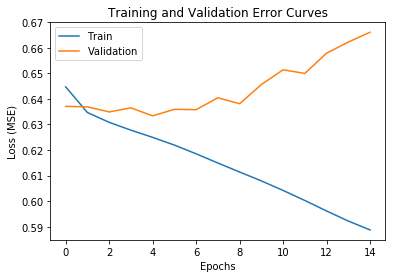

In [8]:
#EXPERIMENTO 4
#Número de Neurônios: 100 -> 100
#Criando novo modelo a ser treinado, executando-o e verificando as métricas:
#Números de camadas ocultas: 2
#Funções de ativação da camadas ocultas: relu -> relu
#Função de ativação da camada de saída: sigmoid
#Otimizador: Adam
#Perda: Binary Cross Entropy

input_dim = X_train.shape[1]
print("input_dim: ", input_dim)

mlp4 = models.Sequential()


mlp4.add(layers.Dense(100, activation='relu', input_dim=input_dim))
mlp4.add(layers.Dense(100, activation='relu'))
mlp4.add(layers.Dense(1, activation='sigmoid'))
mlp4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history4 = mlp4.fit(X_train, Y_train, batch_size=64, epochs=100000,
                         callbacks=[callbacks.EarlyStopping(patience=10)], validation_data=(X_val, Y_val))

utils.plot_training_error_curves(history4)

y_pred_scores4 = mlp4.predict(X_test)
y_pred_class4 = mlp4.predict_classes(X_test, verbose=0)
y_pred_scores_0_4 = 1 - y_pred_scores4
y_pred_scores4 = np.concatenate([y_pred_scores_0_4, y_pred_scores4], axis=1)

Matriz de confusão no conjunto de teste:
[[36206 27569]
 [20932 46118]]

Train Loss:       0.6250
Validation Loss:  0.6334

Performance no conjunto de teste:


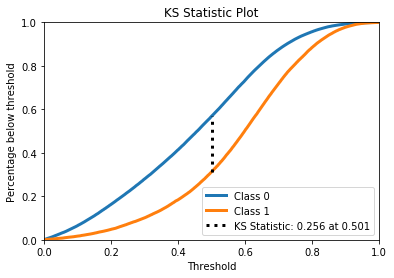


Accuracy:         0.6293
Recall:           0.6878
Precision:        0.6259
F1:               0.6554
AUROC:            0.6732
AUPR:             0.6576


In [9]:
#Avaliando o modelo:
utils.results_summary(history4, Y_test, y_pred_class4, y_pred_scores4)

Aida não temos resultados suficientes para superar o experimento 2.

input_dim:  243
Train on 261647 samples, validate on 130822 samples
Epoch 1/100000
261647/261647 [==============================] - 21s 79us/step - loss: 0.6456 - acc: 0.6279 - val_loss: 0.6372 - val_acc: 0.6375
Epoch 2/100000
261647/261647 [==============================] - 20s 76us/step - loss: 0.6350 - acc: 0.6394 - val_loss: 0.6354 - val_acc: 0.6363
Epoch 3/100000
261647/261647 [==============================] - 22s 84us/step - loss: 0.6310 - acc: 0.6434 - val_loss: 0.6323 - val_acc: 0.6419
Epoch 4/100000
261647/261647 [==============================] - 21s 79us/step - loss: 0.6271 - acc: 0.6474 - val_loss: 0.6334 - val_acc: 0.6400
Epoch 5/100000
261647/261647 [==============================] - 22s 82us/step - loss: 0.6235 - acc: 0.6517 - val_loss: 0.6348 - val_acc: 0.6405
Epoch 6/100000
261647/261647 [==============================] - 18s 68us/step - loss: 0.6193 - acc: 0.6555 - val_loss: 0.6385 - val_acc: 0.6413
Epoch 7/100000
261647/261647 [==============================] - 18s 

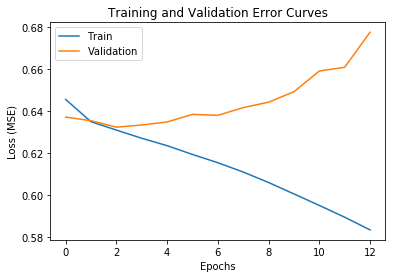

In [10]:
#EXPERIMENTO 5
#Número de Neurônios: 150 -> 100 -> 50
#Criando novo modelo a ser treinado, executando-o e verificando as métricas:
#Números de camadas ocultas: 3
#Funções de ativação da camadas ocultas: relu -> relu -> relu
#Função de ativação da camada de saída: sigmoid
#Otimizador: Adam
#Perda: Binary Cross Entropy

input_dim = X_train.shape[1]
print("input_dim: ", input_dim)

mlp5 = models.Sequential()


mlp5.add(layers.Dense(150, activation='relu', input_dim=input_dim))
mlp5.add(layers.Dense(100, activation='relu'))
mlp5.add(layers.Dense(50, activation='relu'))
mlp5.add(layers.Dense(1, activation='sigmoid'))
mlp5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history5 = mlp5.fit(X_train, Y_train, batch_size=64, epochs=100000,
                         callbacks=[callbacks.EarlyStopping(patience=10)], validation_data=(X_val, Y_val))

utils.plot_training_error_curves(history5)

y_pred_scores5 = mlp5.predict(X_test)
y_pred_class5 = mlp5.predict_classes(X_test, verbose=0)
y_pred_scores_0_5 = 1 - y_pred_scores5
y_pred_scores5 = np.concatenate([y_pred_scores_0_5, y_pred_scores5], axis=1)

Matriz de confusão no conjunto de teste:
[[36542 27233]
 [21258 45792]]

Train Loss:       0.6310
Validation Loss:  0.6323

Performance no conjunto de teste:


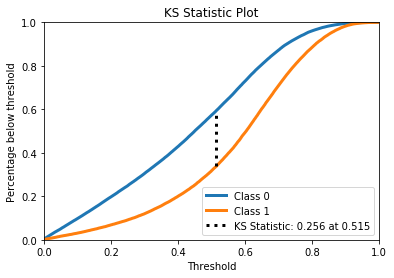


Accuracy:         0.6293
Recall:           0.6830
Precision:        0.6271
F1:               0.6538
AUROC:            0.6722
AUPR:             0.6613


In [11]:
#Avaliando o modelo:
utils.results_summary(history5, Y_test, y_pred_class5, y_pred_scores5)

input_dim:  243
Train on 261647 samples, validate on 130822 samples
Epoch 1/100000
261647/261647 [==============================] - 19s 72us/step - loss: 0.2568 - acc: 0.6165 - val_loss: 0.2339 - val_acc: 0.6212
Epoch 2/100000
261647/261647 [==============================] - 15s 58us/step - loss: 0.2326 - acc: 0.6250 - val_loss: 0.2307 - val_acc: 0.6271
Epoch 3/100000
261647/261647 [==============================] - 14s 54us/step - loss: 0.2316 - acc: 0.6266 - val_loss: 0.2298 - val_acc: 0.6295
Epoch 4/100000
261647/261647 [==============================] - 15s 59us/step - loss: 0.2309 - acc: 0.6271 - val_loss: 0.2299 - val_acc: 0.6283
Epoch 5/100000
261647/261647 [==============================] - 14s 54us/step - loss: 0.2301 - acc: 0.6303 - val_loss: 0.2291 - val_acc: 0.6309
Epoch 6/100000
261647/261647 [==============================] - 16s 62us/step - loss: 0.2295 - acc: 0.6316 - val_loss: 0.2315 - val_acc: 0.6277
Epoch 7/100000
261647/261647 [==============================] - 15s 

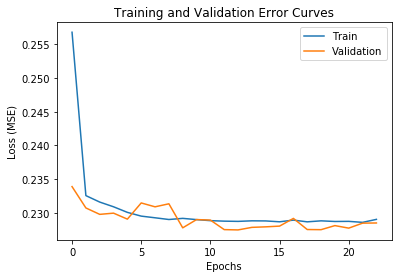

In [4]:
#EXPERIMENTO 7
#Número de Neurônios: 128 -> 64 -> 32
#Criando novo modelo a ser treinado, executando-o e verificando as métricas:
#Números de camadas ocultas: 3
#Funções de ativação da camadas ocultas: tanh -> tanh -> tanh
#Função de ativação da camada de saída: sigmoid
#Otimizador: Adam
#Inicialização de Pesos: he_normal
#Regularização: 0.001
#Perda: MSE

input_dim = X_train.shape[1]
print("input_dim: ", input_dim)

mlp7 = models.Sequential()


mlp7.add(layers.Dense(128, activation='tanh', input_dim=input_dim, 
                      kernel_initializer=tf.keras.initializers.he_normal(seed=None),
                      kernel_regularizer=tf.keras.regularizers.l2(0.001)))
mlp7.add(layers.Dense(64, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
mlp7.add(layers.Dense(32, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
mlp7.add(layers.Dense(1, activation='sigmoid'))
mlp7.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history7 = mlp7.fit(X_train, Y_train, batch_size=64, epochs=100000,
                         callbacks=[callbacks.EarlyStopping(patience=10)], validation_data=(X_val, Y_val))

utils.plot_training_error_curves(history7)

y_pred_scores7 = mlp7.predict(X_test)
y_pred_class7 = mlp7.predict_classes(X_test, verbose=0)
y_pred_scores_0_7 = 1 - y_pred_scores7
y_pred_scores7 = np.concatenate([y_pred_scores_0_7, y_pred_scores7], axis=1)

Matriz de confusão no conjunto de teste:
[[40190 23585]
 [24406 42644]]

Train Loss:       0.2287
Validation Loss:  0.2275

Performance no conjunto de teste:


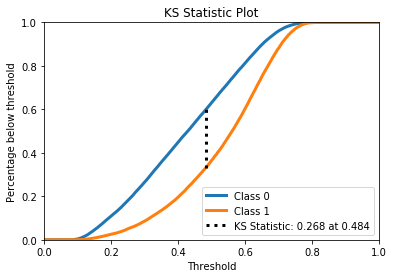


Accuracy:         0.6332
Recall:           0.6360
Precision:        0.6439
F1:               0.6399
AUROC:            0.6829
AUPR:             0.6700


In [5]:
utils.results_summary(history7, Y_test, y_pred_class7, y_pred_scores7)

input_dim:  243
Train on 261647 samples, validate on 130822 samples
Epoch 1/100000
261647/261647 [==============================] - 16s 60us/step - loss: 0.6882 - acc: 0.6194 - val_loss: 0.6565 - val_acc: 0.6301
Epoch 2/100000
261647/261647 [==============================] - 20s 76us/step - loss: 0.6506 - acc: 0.6315 - val_loss: 0.6459 - val_acc: 0.6365
Epoch 3/100000
261647/261647 [==============================] - 18s 69us/step - loss: 0.6477 - acc: 0.6340 - val_loss: 0.6452 - val_acc: 0.6347
Epoch 4/100000
261647/261647 [==============================] - 17s 66us/step - loss: 0.6466 - acc: 0.6339 - val_loss: 0.6460 - val_acc: 0.6361
Epoch 5/100000
261647/261647 [==============================] - 17s 65us/step - loss: 0.6459 - acc: 0.6355 - val_loss: 0.6459 - val_acc: 0.6361
Epoch 6/100000
261647/261647 [==============================] - 17s 63us/step - loss: 0.6450 - acc: 0.6354 - val_loss: 0.6439 - val_acc: 0.6371
Epoch 7/100000
261647/261647 [==============================] - 17s 

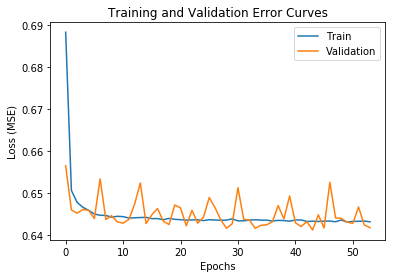

In [6]:
#EXPERIMENTO 8
#Número de Neurônios: 128 -> 64 -> 32
#Criando novo modelo a ser treinado, executando-o e verificando as métricas:
#Números de camadas ocultas: 3
#Funções de ativação da camadas ocultas: relu -> relu -> relu
#Função de ativação da camada de saída: sigmoid
#Otimizador: Adam
#Inicialização de Pesos: he_normal
#Regularização: 0.001
#Perda: Binary Cross Entropy

input_dim = X_train.shape[1]
print("input_dim: ", input_dim)

mlp8 = models.Sequential()


mlp8.add(layers.Dense(128, activation='relu', input_dim=input_dim, 
                      kernel_initializer=tf.keras.initializers.he_normal(seed=None),
                      kernel_regularizer=tf.keras.regularizers.l2(0.001)))
mlp8.add(layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
mlp8.add(layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
mlp8.add(layers.Dense(1, activation='sigmoid'))
mlp8.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history8 = mlp8.fit(X_train, Y_train, batch_size=64, epochs=100000,
                         callbacks=[callbacks.EarlyStopping(patience=10)], validation_data=(X_val, Y_val))

utils.plot_training_error_curves(history8)

y_pred_scores8 = mlp8.predict(X_test)
y_pred_class8 = mlp8.predict_classes(X_test, verbose=0)
y_pred_scores_0_8 = 1 - y_pred_scores8
y_pred_scores8 = np.concatenate([y_pred_scores_0_8, y_pred_scores8], axis=1)

Matriz de confusão no conjunto de teste:
[[34835 28940]
 [18562 48488]]

Train Loss:       0.6433
Validation Loss:  0.6412

Performance no conjunto de teste:


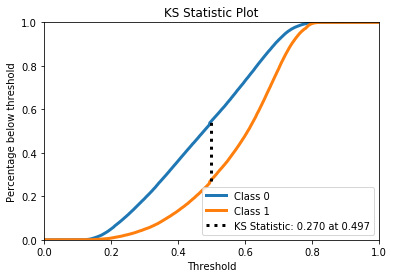


Accuracy:         0.6369
Recall:           0.7232
Precision:        0.6262
F1:               0.6712
AUROC:            0.6870
AUPR:             0.6744


In [7]:
utils.results_summary(history8, Y_test, y_pred_class8, y_pred_scores8)

input_dim:  243
Train on 261647 samples, validate on 130822 samples
Epoch 1/100000
261647/261647 [==============================] - 16s 61us/step - loss: 0.6858 - acc: 0.6227 - val_loss: 0.6501 - val_acc: 0.6324
Epoch 2/100000
261647/261647 [==============================] - 20s 78us/step - loss: 0.6488 - acc: 0.6319 - val_loss: 0.6521 - val_acc: 0.6262
Epoch 3/100000
261647/261647 [==============================] - 17s 67us/step - loss: 0.6455 - acc: 0.6342 - val_loss: 0.6423 - val_acc: 0.6379
Epoch 4/100000
261647/261647 [==============================] - 15s 59us/step - loss: 0.6445 - acc: 0.6362 - val_loss: 0.6441 - val_acc: 0.6367
Epoch 5/100000
261647/261647 [==============================] - 15s 57us/step - loss: 0.6437 - acc: 0.6357 - val_loss: 0.6541 - val_acc: 0.6263
Epoch 6/100000
261647/261647 [==============================] - 16s 61us/step - loss: 0.6432 - acc: 0.6357 - val_loss: 0.6408 - val_acc: 0.6377
Epoch 7/100000
261647/261647 [==============================] - 15s 

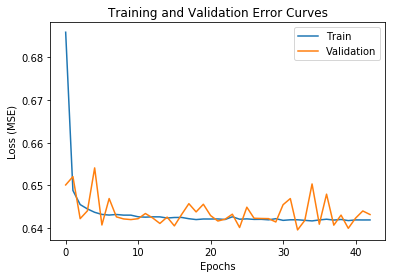

In [8]:
#EXPERIMENTO 9
#Número de Neurônios: 128 -> 128
#Criando novo modelo a ser treinado, executando-o e verificando as métricas:
#Números de camadas ocultas: 3
#Funções de ativação da camadas ocultas: relu -> relu
#Função de ativação da camada de saída: sigmoid
#Otimizador: Adam
#Inicialização de Pesos: he_normal
#Regularização: 0.001
#Perda: Binary Cross Entropy

input_dim = X_train.shape[1]
print("input_dim: ", input_dim)

mlp9 = models.Sequential()


mlp9.add(layers.Dense(128, activation='relu', input_dim=input_dim, 
                      kernel_initializer=tf.keras.initializers.he_normal(seed=None),
                      kernel_regularizer=tf.keras.regularizers.l2(0.001)))
mlp9.add(layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
mlp9.add(layers.Dense(1, activation='sigmoid'))
mlp9.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history9 = mlp9.fit(X_train, Y_train, batch_size=64, epochs=100000,
                         callbacks=[callbacks.EarlyStopping(patience=10)], validation_data=(X_val, Y_val))

utils.plot_training_error_curves(history9)

y_pred_scores9 = mlp9.predict(X_test)
y_pred_class9 = mlp9.predict_classes(X_test, verbose=0)
y_pred_scores_0_9 = 1 - y_pred_scores8
y_pred_scores9 = np.concatenate([y_pred_scores_0_9, y_pred_scores9], axis=1)

Matriz de confusão no conjunto de teste:
[[30224 33551]
 [14316 52734]]

Train Loss:       0.6420
Validation Loss:  0.6396

Performance no conjunto de teste:


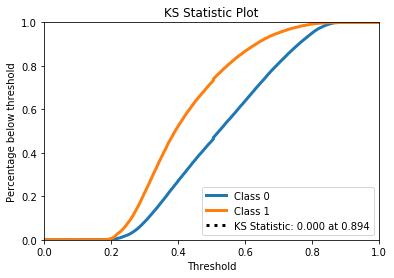


Accuracy:         0.6341
Recall:           0.7865
Precision:        0.6112
F1:               0.6878
AUROC:            0.3130
AUPR:             0.3931


In [9]:
utils.results_summary(history9, Y_test, y_pred_class9, y_pred_scores9)

input_dim:  243
Train on 261647 samples, validate on 130822 samples
Epoch 1/100000
261647/261647 [==============================] - 17s 64us/step - loss: 0.2574 - acc: 0.6177 - val_loss: 0.2312 - val_acc: 0.6250
Epoch 2/100000
261647/261647 [==============================] - 19s 73us/step - loss: 0.2322 - acc: 0.6238 - val_loss: 0.2306 - val_acc: 0.6299
Epoch 3/100000
261647/261647 [==============================] - 15s 59us/step - loss: 0.2313 - acc: 0.6256 - val_loss: 0.2301 - val_acc: 0.6289
Epoch 4/100000
261647/261647 [==============================] - 19s 74us/step - loss: 0.2304 - acc: 0.6273 - val_loss: 0.2326 - val_acc: 0.6251
Epoch 5/100000
261647/261647 [==============================] - 18s 69us/step - loss: 0.2299 - acc: 0.6301 - val_loss: 0.2295 - val_acc: 0.6322
Epoch 6/100000
261647/261647 [==============================] - 20s 76us/step - loss: 0.2295 - acc: 0.6321 - val_loss: 0.2279 - val_acc: 0.6343
Epoch 7/100000
261647/261647 [==============================] - 17s 

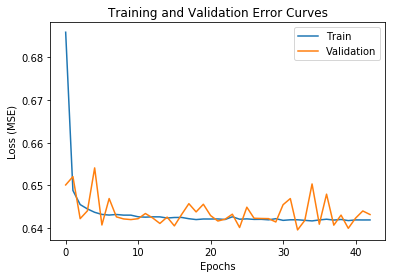

In [10]:
#EXPERIMENTO 10
#Número de Neurônios: 128 -> 128
#Criando novo modelo a ser treinado, executando-o e verificando as métricas:
#Números de camadas ocultas: 3
#Funções de ativação da camadas ocultas: tanh -> tanh
#Função de ativação da camada de saída: sigmoid
#Otimizador: Adam
#Inicialização de Pesos: he_normal
#Regularização: 0.001
#Perda: MSE

input_dim = X_train.shape[1]
print("input_dim: ", input_dim)

mlp10 = models.Sequential()


mlp10.add(layers.Dense(128, activation='tanh', input_dim=input_dim, 
                      kernel_initializer=tf.keras.initializers.he_normal(seed=None),
                      kernel_regularizer=tf.keras.regularizers.l2(0.001)))
mlp10.add(layers.Dense(128, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
mlp10.add(layers.Dense(1, activation='sigmoid'))
mlp10.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history10 = mlp10.fit(X_train, Y_train, batch_size=64, epochs=100000,
                         callbacks=[callbacks.EarlyStopping(patience=10)], validation_data=(X_val, Y_val))

utils.plot_training_error_curves(history9)

y_pred_scores10 = mlp10.predict(X_test)
y_pred_class10 = mlp10.predict_classes(X_test, verbose=0)
y_pred_scores_0_10 = 1 - y_pred_scores8
y_pred_scores10 = np.concatenate([y_pred_scores_0_10, y_pred_scores10], axis=1)

Matriz de confusão no conjunto de teste:
[[35687 28088]
 [19310 47740]]

Train Loss:       0.2277
Validation Loss:  0.2263

Performance no conjunto de teste:


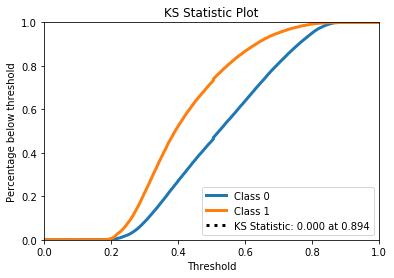


Accuracy:         0.6377
Recall:           0.7120
Precision:        0.6296
F1:               0.6683
AUROC:            0.3130
AUPR:             0.3931


In [11]:
utils.results_summary(history10, Y_test, y_pred_class10, y_pred_scores10)

input_dim:  243
Train on 261647 samples, validate on 130822 samples
Epoch 1/100000
261647/261647 [==============================] - 17s 65us/step - loss: 0.7068 - acc: 0.6183 - val_loss: 0.6545 - val_acc: 0.6283
Epoch 2/100000
261647/261647 [==============================] - 18s 68us/step - loss: 0.6540 - acc: 0.6270 - val_loss: 0.6552 - val_acc: 0.6251
Epoch 3/100000
261647/261647 [==============================] - 22s 83us/step - loss: 0.6502 - acc: 0.6310 - val_loss: 0.6545 - val_acc: 0.6234
Epoch 4/100000
261647/261647 [==============================] - 26s 99us/step - loss: 0.6486 - acc: 0.6322 - val_loss: 0.6451 - val_acc: 0.6355
Epoch 5/100000
261647/261647 [==============================] - 20s 78us/step - loss: 0.6470 - acc: 0.6341 - val_loss: 0.6437 - val_acc: 0.6366
Epoch 6/100000
261647/261647 [==============================] - 24s 91us/step - loss: 0.6465 - acc: 0.6348 - val_loss: 0.6435 - val_acc: 0.6379
Epoch 7/100000
261647/261647 [==============================] - 19s 

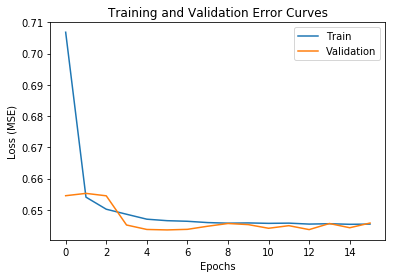

In [13]:
#EXPERIMENTO 11:
#Número de Neurônios: 128 -> 64 -> 32
#Criando novo modelo a ser treinado, executando-o e verificando as métricas:
#Números de camadas ocultas: 3
#Funções de ativação da camadas ocultas: tanh -> tanh
#Função de ativação da camada de saída: sigmoid
#Otimizador: Adam
#Inicialização de Pesos: he_normal
#Regularização: 0.001
#Perda: Binary Cross Entropy

input_dim = X_train.shape[1]
print("input_dim: ", input_dim)

mlp11 = models.Sequential()


mlp11.add(layers.Dense(128, activation='tanh', input_dim=input_dim, 
                      kernel_initializer=tf.keras.initializers.he_normal(seed=None),
                      kernel_regularizer=tf.keras.regularizers.l2(0.001)))
mlp11.add(layers.Dense(64, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
mlp11.add(layers.Dense(32, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
mlp11.add(layers.Dense(1, activation='sigmoid'))
mlp11.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history11 = mlp11.fit(X_train, Y_train, batch_size=64, epochs=100000,
                         callbacks=[callbacks.EarlyStopping(patience=10)], validation_data=(X_val, Y_val))

utils.plot_training_error_curves(history11)

y_pred_scores11 = mlp11.predict(X_test)
y_pred_class11 = mlp11.predict_classes(X_test, verbose=0)
y_pred_scores_0_11 = 1 - y_pred_scores11
y_pred_scores11 = np.concatenate([y_pred_scores_0_11, y_pred_scores11], axis=1)

Matriz de confusão no conjunto de teste:
[[41729 22046]
 [26114 40936]]

Train Loss:       0.6465
Validation Loss:  0.6435

Performance no conjunto de teste:


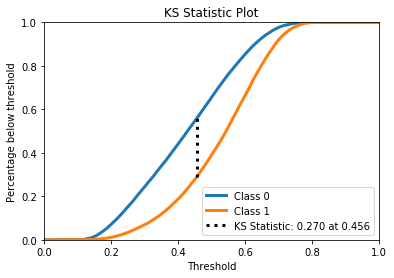


Accuracy:         0.6319
Recall:           0.6105
Precision:        0.6500
F1:               0.6296
AUROC:            0.6872
AUPR:             0.6747


In [14]:
utils.results_summary(history11, Y_test, y_pred_class11, y_pred_scores11)

input_dim:  243
Train on 261647 samples, validate on 130822 samples
Epoch 1/100000
261647/261647 [==============================] - 17s 64us/step - loss: 0.2635 - acc: 0.6157 - val_loss: 0.2339 - val_acc: 0.6267
Epoch 2/100000
261647/261647 [==============================] - 15s 59us/step - loss: 0.2346 - acc: 0.6235 - val_loss: 0.2327 - val_acc: 0.6275
Epoch 3/100000
261647/261647 [==============================] - 16s 61us/step - loss: 0.2335 - acc: 0.6247 - val_loss: 0.2383 - val_acc: 0.6124
Epoch 4/100000
261647/261647 [==============================] - 16s 59us/step - loss: 0.2328 - acc: 0.6251 - val_loss: 0.2322 - val_acc: 0.6277
Epoch 5/100000
261647/261647 [==============================] - 16s 60us/step - loss: 0.2327 - acc: 0.6260 - val_loss: 0.2314 - val_acc: 0.6296
Epoch 6/100000
261647/261647 [==============================] - 16s 61us/step - loss: 0.2322 - acc: 0.6256 - val_loss: 0.2305 - val_acc: 0.6298
Epoch 7/100000
261647/261647 [==============================] - 16s 

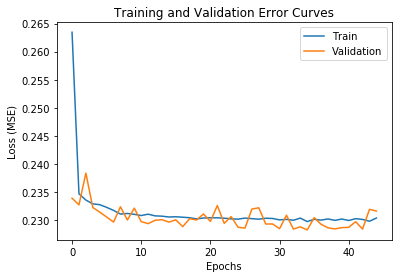

In [15]:
#EXPERIMENTO 12
#Número de Neurônios: 128 -> 64 -> 32
#Criando novo modelo a ser treinado, executando-o e verificando as métricas:
#Números de camadas ocultas: 3
#Funções de ativação da camadas ocultas: tanh -> tanh -> tanh
#Função de ativação da camada de saída: sigmoid
#Otimizador: Adam
#Inicialização de Pesos: he_normal
#Regularização: 0.001 -> 0.005 -> 0.005 
#Perda: MSE

input_dim = X_train.shape[1]
print("input_dim: ", input_dim)

mlp12 = models.Sequential()


mlp12.add(layers.Dense(128, activation='tanh', input_dim=input_dim, 
                      kernel_initializer=tf.keras.initializers.he_normal(seed=None),
                      kernel_regularizer=tf.keras.regularizers.l2(0.001)))
mlp12.add(layers.Dense(64, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.005)))
mlp12.add(layers.Dense(32, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.005)))
mlp12.add(layers.Dense(1, activation='sigmoid'))
mlp12.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history12 = mlp12.fit(X_train, Y_train, batch_size=64, epochs=100000,
                         callbacks=[callbacks.EarlyStopping(patience=10)], validation_data=(X_val, Y_val))

utils.plot_training_error_curves(history12)

y_pred_scores12 = mlp12.predict(X_test)
y_pred_class12 = mlp12.predict_classes(X_test, verbose=0)
y_pred_scores_0_12 = 1 - y_pred_scores12
y_pred_scores12 = np.concatenate([y_pred_scores_0_12, y_pred_scores12], axis=1)

Matriz de confusão no conjunto de teste:
[[28175 35600]
 [12716 54334]]

Train Loss:       0.2297
Validation Loss:  0.2282

Performance no conjunto de teste:


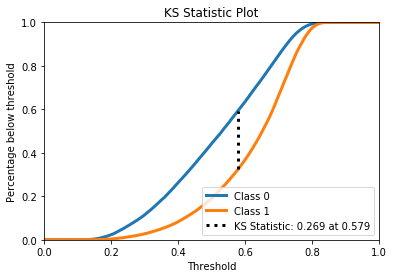


Accuracy:         0.6307
Recall:           0.8104
Precision:        0.6042
F1:               0.6922
AUROC:            0.6837
AUPR:             0.6704


In [16]:
utils.results_summary(history12, Y_test, y_pred_class12, y_pred_scores12)

input_dim:  243
Train on 261647 samples, validate on 130822 samples
Epoch 1/100000
261647/261647 [==============================] - 20s 76us/step - loss: 0.2537 - acc: 0.6165 - val_loss: 0.2330 - val_acc: 0.6277
Epoch 2/100000
261647/261647 [==============================] - 27s 102us/step - loss: 0.2333 - acc: 0.6278 - val_loss: 0.2342 - val_acc: 0.6237
Epoch 3/100000
261647/261647 [==============================] - 22s 84us/step - loss: 0.2316 - acc: 0.6297 - val_loss: 0.2309 - val_acc: 0.6319
Epoch 4/100000
261647/261647 [==============================] - 21s 79us/step - loss: 0.2306 - acc: 0.6318 - val_loss: 0.2298 - val_acc: 0.6353
Epoch 5/100000
261647/261647 [==============================] - 18s 70us/step - loss: 0.2301 - acc: 0.6335 - val_loss: 0.2318 - val_acc: 0.6265
Epoch 6/100000
261647/261647 [==============================] - 23s 90us/step - loss: 0.2299 - acc: 0.6332 - val_loss: 0.2312 - val_acc: 0.6282
Epoch 7/100000
261647/261647 [==============================] - 24s

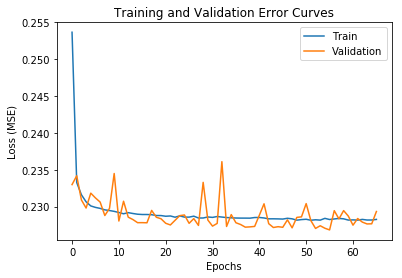

In [23]:
#Número de Neurônios: 150 -> 75 -> 35
#Criando novo modelo a ser treinado, executando-o e verificando as métricas:
#Números de camadas ocultas: 3
#Funções de ativação da camadas ocultas: tanh -> tanh -> tanh
#Função de ativação da camada de saída: sigmoid
#Otimizador: Adam
#Inicialização de Pesos: he_normal
#Regularização: 0.001 -> 0.003 -> 0.003
#Perda: MSE

input_dim = X_train.shape[1]
print("input_dim: ", input_dim)

mlp13 = models.Sequential()


mlp13.add(layers.Dense(100, activation='relu', input_dim=input_dim, 
                      kernel_initializer=tf.keras.initializers.he_normal(seed=None),
                      kernel_regularizer=tf.keras.regularizers.l2(0.001)))
mlp13.add(layers.Dense(50, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.003)))
mlp13.add(layers.Dense(25, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.003)))
mlp13.add(layers.Dense(1, activation='sigmoid'))
mlp13.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history13 = mlp13.fit(X_train, Y_train, batch_size=64, epochs=100000,
                         callbacks=[callbacks.EarlyStopping(patience=10)], validation_data=(X_val, Y_val))

utils.plot_training_error_curves(history13)

y_pred_scores13 = mlp13.predict(X_test)
y_pred_class13 = mlp13.predict_classes(X_test, verbose=0)
y_pred_scores_0_13 = 1 - y_pred_scores13
y_pred_scores13 = np.concatenate([y_pred_scores_0_13, y_pred_scores13], axis=1)

Matriz de confusão no conjunto de teste:
[[29220 34555]
 [13626 53424]]

Train Loss:       0.2282
Validation Loss:  0.2268

Performance no conjunto de teste:


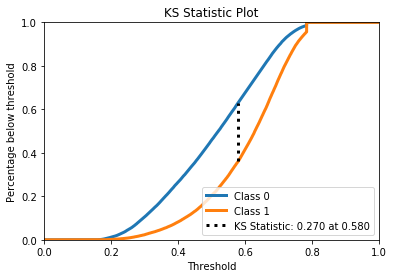


Accuracy:         0.6317
Recall:           0.7968
Precision:        0.6072
F1:               0.6892
AUROC:            0.6839
AUPR:             0.6669


In [24]:
utils.results_summary(history13, Y_test, y_pred_class13, y_pred_scores13)

<h2> Observações: </h2>
    
* Número de neurônios influencia mas não é aconselhável tão alto;
* Número de camadas ocultas 3 pode estar bom para MLP
* Neurônios por camada 128->64->32 e 100->50->25 apresentaram melhores resultados;
* Relu tem resultados razoáveis, mas com algumas configurações de parâmetros Tanh também consegue alguns;
* Regularização ajuda a prevenir overfitting e melhora as métricas, mas também é importante testar com diferentes valores;
* Diferentes tipos de inicialização podem ajudar(veja he_normal);
* É recomendado a seleção das melhores configurações de redes para fazer um ensemble.